## Project 3 - Experiments

In [11]:
from sp_exact_3 import *

import os
import matplotlib.pyplot as plt

What is the score of an optimal aligment of the first 3 sequences in brca1-testseqs.fasta (i.e. brca1_bos_taurus, brca1_canis_lupus and brca1_gallus_gallus) as computed by your program sp_exact_3? How does an optimal alignment look like?

What is the score of the alignment of the first 5 sequences in brca1-testseqs.fasta (i.e. brca1_bos_taurus, brca1_canis_lupus, brca1_gallus_gallus, brca1_homo_sapiens, and brca1_macaca_mulatta) as computed by your program sp_approx? Which of the 5 sequences is choosen as the 'center string'?

Make an experiment comparing the scores of the alignments computed by sp_exact_3 and sp_approx that validates that the approximation ratio of sp_approx is 2(k-1)/k for k sequences. i.e 4/3 for three sequences.

You should use the testdata in testseqs.zip that contains 20 fasta files (testseqs_10_3.fasta, testseqs_20_3.fasta, ..., testseqs_200_3.fasta) each containing 3 sequences of lengths 10, 20, ..., 200.

For each triplet of sequences (i.e. each fasta file), you should compute the optimal score of an MSA using sp_exact_3 and the score of the alignment produced by sp_approx. Make a graph in which you plot the ratio of the computed scores for each sequence length. Comment on what you observe.

In [9]:
# *** PARTIALLY NEEDS 2-APPROX *** #

# Path to the directory containing the files
directory_path = '../data/testseqs'
# load score matrix
matrix_file = '../data/score_matrix.txt'
score_matrix = initiate_score_matrix(matrix_file)
gap_cost = 5
hide_alignments = True

score_dct = {}

# Iterate over each file in the directory
for filename in os.listdir(directory_path):
    # Check if the current item is a file
    if os.path.isfile(os.path.join(directory_path, filename)):
        #read fasta file
        sequence_dct = read_fasta_file(os.path.join(directory_path, filename))

        # extract the sequence length from name
        file_number = str(''.join(filter(str.isdigit, filename)))
        file_number = file_number[:-1]


        sequence_lst = [] # convert dct values to list
        iterator = iter(sequence_dct.values()) # Extracting the sequences without their corresponding headers and putting them into a list
        for _ in range(len(sequence_dct)):
            sequence_lst.append(next(iterator))

        

        seq1 = sequence_lst[0]
        seq2 = sequence_lst[1]
        seq3 = sequence_lst[2]

        aligned_exact = sp_exact_3(seq1, seq2, seq3, gap_cost, score_matrix, hide_alignments = hide_alignments) #

        score_dct[file_number] = aligned_exact
        print("File:", filename, " Length:", file_number, " Score:", aligned_exact) # print progress
print(score_dct)


File: testseqs_100_3.fasta  Length: 100  Score: 687
File: testseqs_10_3.fasta  Length: 10  Score: 70
File: testseqs_110_3.fasta  Length: 110  Score: 754
File: testseqs_120_3.fasta  Length: 120  Score: 810
File: testseqs_130_3.fasta  Length: 130  Score: 895
File: testseqs_140_3.fasta  Length: 140  Score: 957
File: testseqs_150_3.fasta  Length: 150  Score: 1023
File: testseqs_160_3.fasta  Length: 160  Score: 1080
File: testseqs_170_3.fasta  Length: 170  Score: 1186
File: testseqs_180_3.fasta  Length: 180  Score: 1158
File: testseqs_190_3.fasta  Length: 190  Score: 1323
File: testseqs_200_3.fasta  Length: 200  Score: 1379
File: testseqs_20_3.fasta  Length: 20  Score: 135
File: testseqs_30_3.fasta  Length: 30  Score: 231
File: testseqs_40_3.fasta  Length: 40  Score: 318
File: testseqs_50_3.fasta  Length: 50  Score: 385
File: testseqs_60_3.fasta  Length: 60  Score: 440
File: testseqs_70_3.fasta  Length: 70  Score: 516
File: testseqs_80_3.fasta  Length: 80  Score: 589
File: testseqs_90_3.fas

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


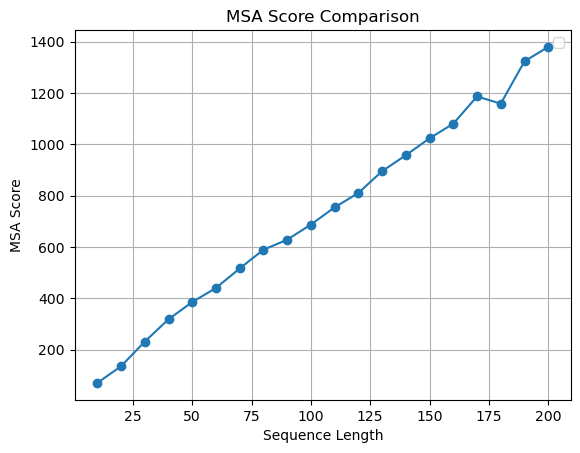

In [15]:
# Your dictionary - copied from chunk above (faster than running it again)
data_exact = {'100': 687, '10': 70, '110': 754, '120': 810, '130': 895, '140': 957, '150': 1023, '160': 1080, '170': 1186, '180': 1158, '190': 1323, '200': 1379, '20': 135, '30': 231, '40': 318, '50': 385, '60': 440, '70': 516, '80': 589, '90': 628}


# Convert dictionary keys to integers and sort them
sorted_keys = sorted(map(int, data_exact.keys()))

# Get corresponding values for sorted keys
sorted_values = [data_exact[str(key)] for key in sorted_keys]

# Plot the data
plt.plot(sorted_keys, sorted_values, marker='o', linestyle='-')

# Label the axes
plt.xlabel('Sequence Length')
plt.ylabel('MSA Score')

plt.title('MSA Score Comparison') # Add title
plt.grid(True) # Show grid
plt.legend() # Get a legend


# Show the plot
plt.show()